In [4]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import keras
from  keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import classification_report

In [5]:
batch_size = 64
num_classes = 10
epochs = 50
data_augmentation = False

In [7]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('train samples : ',x_train.shape[0])
print('test samples : ',x_test.shape[0])

170498071/170498071 [==============================] - 206s 1us/step
x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
train samples :  50000
test samples :  10000


In [8]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#encoding
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)


In [11]:
#model Convnet
 
model = Sequential()

model.add(Conv2D(32,(3,3),padding = 'same',input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_2 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                     

In [22]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [23]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test), shuffle = True)


Epoch 1/50


782/782 [==============================] - 189s 235ms/step - loss: 1.2124 - accuracy: 0.5852 - val_loss: 1.0423 - val_accuracy: 0.6381
Epoch 2/50
782/782 [==============================] - 189s 242ms/step - loss: 0.7762 - accuracy: 0.7302 - val_loss: 0.9514 - val_accuracy: 0.6687
Epoch 3/50
782/782 [==============================] - 190s 243ms/step - loss: 0.5969 - accuracy: 0.7903 - val_loss: 0.7484 - val_accuracy: 0.7429
Epoch 4/50
782/782 [==============================] - 193s 246ms/step - loss: 0.4612 - accuracy: 0.8391 - val_loss: 0.7729 - val_accuracy: 0.7432
Epoch 5/50
782/782 [==============================] - 193s 247ms/step - loss: 0.3489 - accuracy: 0.8787 - val_loss: 0.7876 - val_accuracy: 0.7617
Epoch 6/50
782/782 [==============================] - 195s 249ms/step - loss: 0.2375 - accuracy: 0.9173 - val_loss: 0.8153 - val_accuracy: 0.7592
Epoch 7/50
782/782 [==============================] - 197s 252ms/step - loss: 0.1631 - accuracy: 0.9450 - val_loss: 0.9710

In [24]:
evaluate_result = model.evaluate(x_test, y_test)

313/313 [==============================] - 11s 36ms/step - loss: 1.4847 - accuracy: 0.7895


In [25]:
print("Test loss : ", evaluate_result[0])
print("Test Accuracy : ", evaluate_result[1])

Test loss :  1.4846692085266113
Test Accuracy :  0.7894999980926514


In [26]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [27]:
predictions = model.predict(x_test)

313/313 [==============================] - 11s 32ms/step


In [28]:
predicted_labels = np.argmax(predictions, axis = 1)
true_labels = np.argmax(y_test, axis = 1)

In [29]:
report = classification_report(true_labels, predicted_labels)

In [30]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.91      0.87      0.89      1000
           2       0.72      0.72      0.72      1000
           3       0.63      0.58      0.60      1000
           4       0.76      0.78      0.77      1000
           5       0.72      0.70      0.71      1000
           6       0.81      0.87      0.84      1000
           7       0.85      0.80      0.82      1000
           8       0.87      0.86      0.87      1000
           9       0.82      0.91      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [31]:
num_samples_to_display = 5
random_indices = np.random.choice(len(x_test), num_samples_to_display, replace=False)

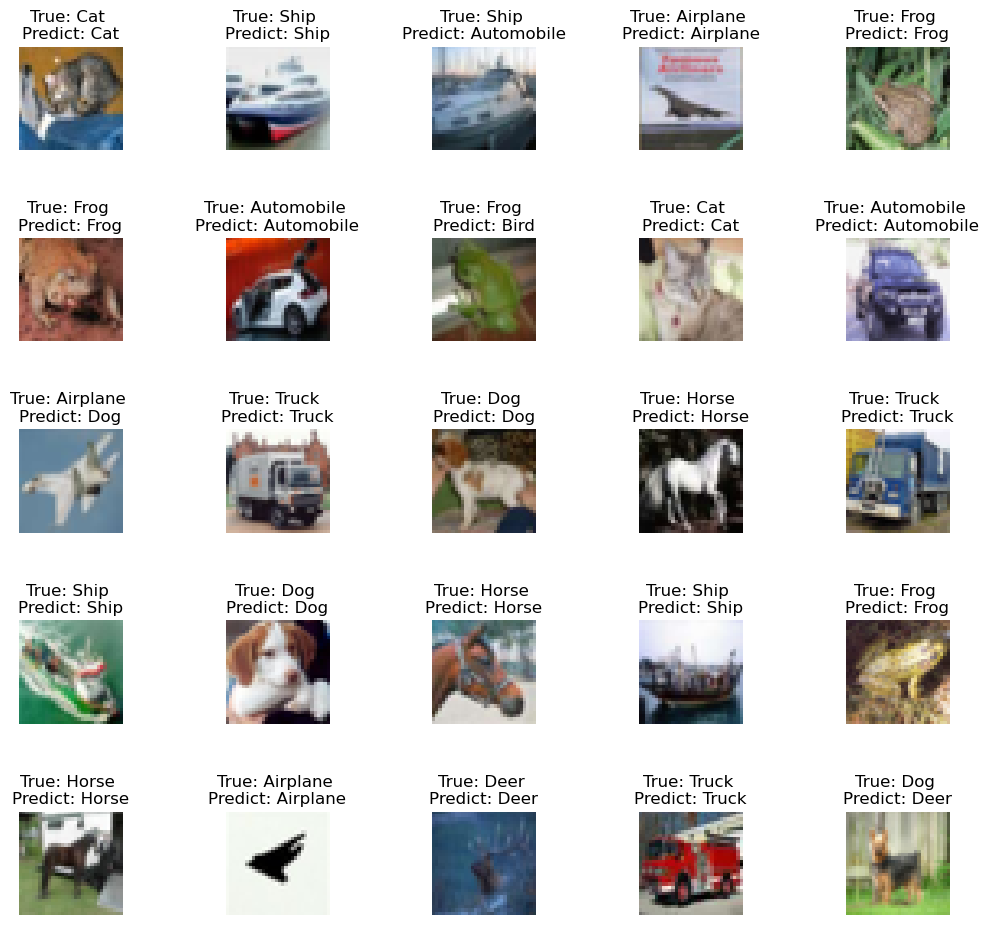

In [36]:
labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

fig, axes = plt.subplots(5,5,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" %(labels[true_labels[i]], labels[predicted_labels[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 1)

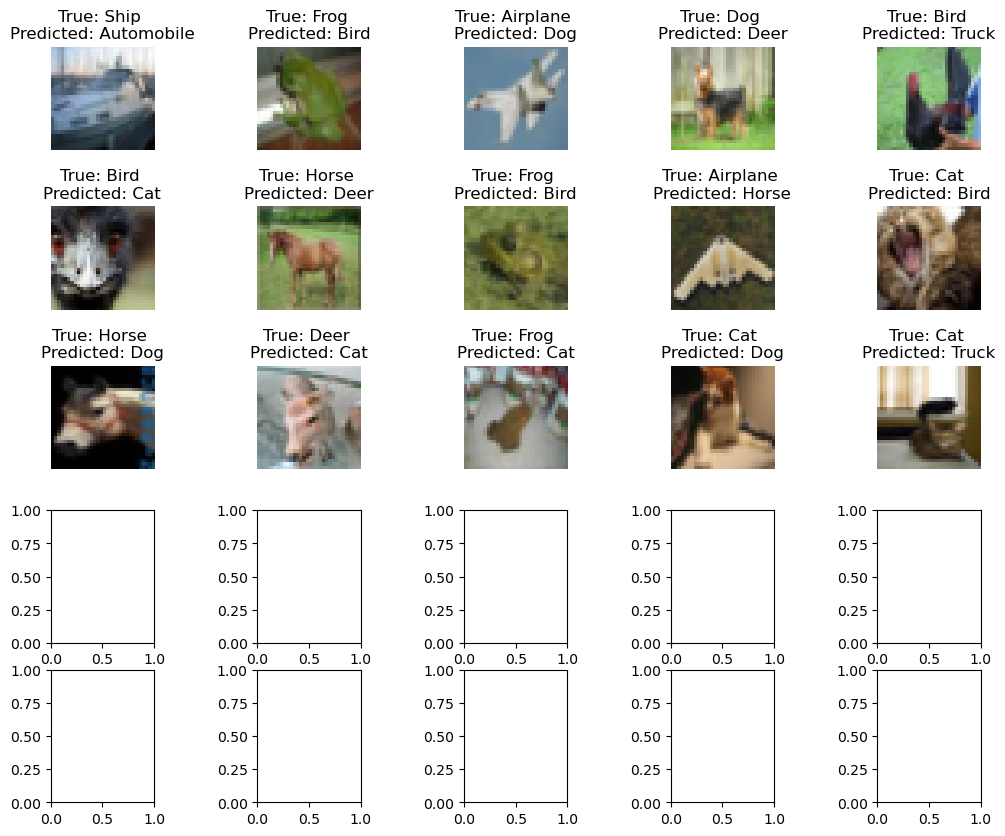

In [38]:
labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

fig, axes = plt.subplots(5,5,figsize=(12,10))
axes = axes.ravel()

misclassified = np.where(predicted_labels != true_labels)[0]
for i in np.arange(0,15):
    axes[i].imshow(x_test[misclassified[i]])
    axes[i].set_title("True: %s \nPredicted: %s" %(labels[true_labels[misclassified[i]]], labels[predicted_labels[misclassified[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 1)
